<a href="https://colab.research.google.com/github/mengwangk/dl-projects/blob/master/number_train_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Methods

## Clone the repo

In [13]:
!rm -rf dl-projects
!git clone https://github.com/mengwangk/dl-projects
!cd dl-projects && ls

Cloning into 'dl-projects'...
remote: Enumerating objects: 205, done.
remote: Counting objects: 100% (205/205), done.
remote: Compressing objects: 100% (152/152), done.
remote: Total 205 (delta 97), reused 126 (delta 40), pack-reused 0
Receiving objects: 100% (205/205), 7.83 MiB | 12.14 MiB/s, done.
Resolving deltas: 100% (97/97), done.
backup	       lstm_s2.ipynb  number_download.ipynb  scraper
datasets       lstm_s3.ipynb  number_features.ipynb  stock.ipynb
featurelib     lstm_s4.ipynb  number_train_dl.ipynb
LICENSE        lstm_s5.ipynb  number_train_ml.ipynb
lstm_s1.ipynb  lstm_s6.ipynb  README.md


## Magic

In [0]:
%reload_ext autoreload
%autoreload 2

%matplotlib inline

In [0]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import pandas as pd
import featuretools as ft
import matplotlib as mpl
import matplotlib.pyplot as plt

In [0]:
from fastai.basics import *
from fastai.tabular import *

## Setup

In [0]:
# to make this notebook's output stable across runs
np.random.seed(42)

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

from IPython.display import display
pd.options.display.max_columns = 50
pd.options.display.html.table_schema = True

In [0]:
from pathlib import Path

DATASET = Path("dl-projects/datasets/lotto/data_processed.csv")

## Load Data

In [0]:
# Read into data frame
dataset = pd.read_csv(DATASET, header=0, sep=',', quotechar='"')

In [0]:
df = dataset.copy()

In [28]:
df.tail(10)

,DrawNo,DrawDate,PrizeType,LuckyNo,DaysSinceLastExactMatch,DaysUntilNextExactMatch,DaysSinceLastAnyMatch,DaysUntilNextAnyMatch,1st_digit,2nd_digit,3rd_digit,4th_digit,DrawYear,DrawMonth,DrawWeek,DrawDay,DrawDayofweek,DrawDayofyear,CumProbaExactMatch,CumProbaAnyMatch,0_1,0_2,0_3,0_4,0_5,...,pos_2_5_freq,pos_2_6_freq,pos_2_7_freq,pos_2_8_freq,pos_2_9_freq,pos_3_0_freq,pos_3_1_freq,pos_3_2_freq,pos_3_3_freq,pos_3_4_freq,pos_3_5_freq,pos_3_6_freq,pos_3_7_freq,pos_3_8_freq,pos_3_9_freq,pos_4_0_freq,pos_4_1_freq,pos_4_2_freq,pos_4_3_freq,pos_4_4_freq,pos_4_5_freq,pos_4_6_freq,pos_4_7_freq,pos_4_8_freq,pos_4_9_freq
104663,495819,2019-06-09,SpecialNo1,9569,705,0,95,0,9,5,6,9,2019,6,23,9,6,160,0.12,1.31,11063,10908,11165,10946,10857,...,10285,10525,10372,10431,10275,10499,10741,10491,10574,10504,10284,10524,10372,10431,10276,10498,10740,10493,10575,10504,10282,10524,10372,10432,10276
104664,495819,2019-06-09,SpecialNo10,6223,735,0,25,0,6,2,2,3,2019,6,23,9,6,160,0.06,1.17,11063,10908,11165,10946,10857,...,10285,10525,10372,10431,10275,10499,10741,10491,10574,10504,10284,10524,10372,10431,10276,10498,10740,10493,10575,10504,10282,10524,10372,10432,10276
104665,495819,2019-06-09,SpecialNo2,791,613,0,28,0,0,7,9,1,2019,6,23,9,6,160,0.11,2.56,11063,10908,11165,10946,10857,...,10285,10525,10372,10431,10275,10499,10741,10491,10574,10504,10284,10524,10372,10431,10276,10498,10740,10493,10575,10504,10282,10524,10372,10432,10276
104666,495819,2019-06-09,SpecialNo3,1218,1628,0,147,0,1,2,1,8,2019,6,23,9,6,160,0.07,1.38,11063,10908,11165,10946,10857,...,10285,10525,10372,10431,10275,10499,10741,10491,10574,10504,10284,10524,10372,10431,10276,10498,10740,10493,10575,10504,10282,10524,10372,10432,10276
104667,495819,2019-06-09,SpecialNo4,3669,14,0,14,0,3,6,6,9,2019,6,23,9,6,160,0.12,1.33,11063,10908,11165,10946,10857,...,10285,10525,10372,10431,10275,10499,10741,10491,10574,10504,10284,10524,10372,10431,10276,10498,10740,10493,10575,10504,10282,10524,10372,10432,10276
104668,495819,2019-06-09,SpecialNo5,9517,603,0,7,0,9,5,1,7,2019,6,23,9,6,160,0.14,2.25,11063,10908,11165,10946,10857,...,10285,10525,10372,10431,10275,10499,10741,10491,10574,10504,10284,10524,10372,10431,10276,10498,10740,10493,10575,10504,10282,10524,10372,10432,10276
104669,495819,2019-06-09,SpecialNo6,1844,1187,0,15,0,1,8,4,4,2019,6,23,9,6,160,0.11,1.46,11063,10908,11165,10946,10857,...,10285,10525,10372,10431,10275,10499,10741,10491,10574,10504,10284,10524,10372,10431,10276,10498,10740,10493,10575,10504,10282,10524,10372,10432,10276
104670,495819,2019-06-09,SpecialNo7,5050,120,0,120,0,5,0,5,0,2019,6,23,9,6,160,0.07,0.49,11063,10908,11165,10946,10857,...,10285,10525,10372,10431,10275,10499,10741,10491,10574,10504,10284,10524,10372,10431,10276,10498,10740,10493,10575,10504,10282,10524,10372,10432,10276
104671,495819,2019-06-09,SpecialNo8,9073,592,0,0,0,9,0,7,3,2019,6,23,9,6,160,0.14,2.64,11063,10908,11165,10946,10857,...,10285,10525,10372,10431,10275,10499,10741,10491,10574,10504,10284,10524,10372,10431,10276,10498,10740,10493,10575,10504,10282,10524,10372,10432,10276
104672,495819,2019-06-09,SpecialNo9,2976,2066,0,39,0,2,9,7,6,2019,6,23,9,6,160,0.08,2.32,11063,10908,11165,10946,10857,...,10285,10525,10372,10431,10275,10499,10741,10491,10574,10504,10284,10524,10372,10431,10276,10498,10740,10493,10575,10504,10282,10524,10372,10432,10276


In [35]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104673 entries, 0 to 104672
Data columns (total 115 columns):
DrawNo                     int64
DrawDate                   object
PrizeType                  object
LuckyNo                    int64
DaysSinceLastExactMatch    int64
DaysUntilNextExactMatch    int64
DaysSinceLastAnyMatch      int64
DaysUntilNextAnyMatch      int64
1st_digit                  int64
2nd_digit                  int64
3rd_digit                  int64
4th_digit                  int64
DrawYear                   int64
DrawMonth                  int64
DrawWeek                   int64
DrawDay                    int64
DrawDayofweek              int64
DrawDayofyear              int64
CumProbaExactMatch         float64
CumProbaAnyMatch           float64
0_1                        int64
0_2                        int64
0_3                        int64
0_4                        int64
0_5                        int64
0_6                        int64
0_7                     

### Field Variables

In [0]:
# Outcome to predict
dep_var = "LuckyNo"

### Train and Validation Split

In [0]:
n = len(df_processed); n

104397

In [0]:
from sklearn.model_selection import train_test_split

X = df_processed.copy()
y = X[dep_var]; 
print(len(X))
print(len(y))

104397
104397


In [0]:
X.drop([dep_var], inplace=True, axis=1)
X.head(1)

,DrawNo,DrawDate,PrizeType,DrawYear,DrawMonth,DrawWeek,DrawDay,DrawDayofweek,DrawDayofyear,DrawIs_month_end,DrawIs_month_start,DrawIs_quarter_end,DrawIs_quarter_start,DrawIs_year_end,DrawIs_year_start,DrawElapsed
0,40792,1992-05-06,1stPrizeNo,1992,5,19,6,2,127,False,False,False,False,False,False,705110400


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [0]:
print(len(X_train)); print(len(X_test)); print(len(y_train)); print(len(y_test))

73077
31320
73077
31320


### Assignment

In [0]:
train_df = df_processed

## Experiment with a sample

In [0]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104397 entries, 0 to 104396
Data columns (total 17 columns):
DrawNo                  104397 non-null int64
DrawDate                104397 non-null datetime64[ns]
PrizeType               104397 non-null object
LuckyNo                 104397 non-null int64
DrawYear                104397 non-null int64
DrawMonth               104397 non-null int64
DrawWeek                104397 non-null int64
DrawDay                 104397 non-null int64
DrawDayofweek           104397 non-null int64
DrawDayofyear           104397 non-null int64
DrawIs_month_end        104397 non-null bool
DrawIs_month_start      104397 non-null bool
DrawIs_quarter_end      104397 non-null bool
DrawIs_quarter_start    104397 non-null bool
DrawIs_year_end         104397 non-null bool
DrawIs_year_start       104397 non-null bool
DrawElapsed             104397 non-null int64
dtypes: bool(6), datetime64[ns](1), int64(9), object(1)
memory usage: 9.4+ MB


In [0]:
idx = np.random.permutation(range(n))[:6000]
print(n)
print(len(idx))

idx.sort()
print(idx)

small_train_df = train_df.iloc[idx[:3000]]
small_test_df = train_df.iloc[idx[3000:]]

104397
6000
[    35     87     97    114 ... 104302 104306 104360 104366]


In [0]:
# Set continuous and categorical columns
small_cont_vars = ["DrawNo", "DrawElapsed"]
small_cat_vars = ["PrizeType", "DrawYear", "DrawMonth", "DrawWeek", "DrawDay", "DrawDayofweek", 
                  "DrawDayofyear","DrawIs_month_end","DrawIs_month_start", "DrawIs_quarter_end", "DrawIs_quarter_start", "DrawIs_year_end", "DrawIs_year_start"]

In [0]:
small_train_df = small_train_df[small_cat_vars + small_cont_vars + [dep_var]]
small_test_df = small_test_df[small_cat_vars + small_cont_vars + [dep_var]]

In [0]:
small_train_df.head(5)

,PrizeType,DrawYear,DrawMonth,DrawWeek,DrawDay,DrawDayofweek,DrawDayofyear,DrawIs_month_end,DrawIs_month_start,DrawIs_quarter_end,DrawIs_quarter_start,DrawIs_year_end,DrawIs_year_start,DrawNo,DrawElapsed,LuckyNo
35,ConsolationNo9,1992,5,19,7,3,128,False,False,False,False,False,False,40892,705196800,4640
87,SpecialNo5,1992,5,20,13,2,134,False,False,False,False,False,False,41092,705715200,6792
97,ConsolationNo2,1992,5,20,14,3,135,False,False,False,False,False,False,41192,705801600,6817
114,SpecialNo9,1992,5,20,14,3,135,False,False,False,False,False,False,41192,705801600,5664
127,ConsolationNo9,1992,5,20,17,6,138,False,False,False,False,False,False,41292,706060800,3573


In [0]:
small_test_df.head(5)

,PrizeType,DrawYear,DrawMonth,DrawWeek,DrawDay,DrawDayofweek,DrawDayofyear,DrawIs_month_end,DrawIs_month_start,DrawIs_quarter_end,DrawIs_quarter_start,DrawIs_year_end,DrawIs_year_start,DrawNo,DrawElapsed,LuckyNo
52728,ConsolationNo9,2006,7,27,9,6,190,False,False,False,False,False,False,270006,1152403200,8912
52734,SpecialNo5,2006,7,27,9,6,190,False,False,False,False,False,False,270006,1152403200,8476
52743,ConsolationNo10,2006,7,28,12,2,193,False,False,False,False,False,False,270106,1152662400,1628
52747,ConsolationNo5,2006,7,28,12,2,193,False,False,False,False,False,False,270106,1152662400,8284
52769,ConsolationNo4,2006,7,28,15,5,196,False,False,False,False,False,False,270206,1152921600,2522


In [0]:
categorify = Categorify(small_cat_vars, small_cont_vars)
categorify(small_train_df)
categorify(small_test_df, test=True)

In [0]:
small_train_df.PrizeType.cat.categories

Index(['1stPrizeNo', '2ndPrizeNo', '3rdPrizeNo', 'ConsolationNo1',
       'ConsolationNo10', 'ConsolationNo2', 'ConsolationNo3', 'ConsolationNo4',
       'ConsolationNo5', 'ConsolationNo6', 'ConsolationNo7', 'ConsolationNo8',
       'ConsolationNo9', 'SpecialNo1', 'SpecialNo10', 'SpecialNo2',
       'SpecialNo3', 'SpecialNo4', 'SpecialNo5', 'SpecialNo6', 'SpecialNo7',
       'SpecialNo8', 'SpecialNo9'],
      dtype='object')

In [0]:
small_train_df.PrizeType.cat.codes[:10]

35     12
87     18
97      5
114    22
127    12
134    19
144     6
149    11
164     3
186     2
dtype: int8

In [0]:
small_train_df.PrizeType.head(10)

35     ConsolationNo9
87         SpecialNo5
97     ConsolationNo2
114        SpecialNo9
127    ConsolationNo9
134        SpecialNo6
144    ConsolationNo3
149    ConsolationNo8
164    ConsolationNo1
186        3rdPrizeNo
Name: PrizeType, dtype: category
Categories (23, object): [1stPrizeNo < 2ndPrizeNo < 3rdPrizeNo < ConsolationNo1 ... SpecialNo6 <
                          SpecialNo7 < SpecialNo8 < SpecialNo9]

In [0]:
fill_missing = FillMissing(small_cat_vars, small_cont_vars)
fill_missing(small_train_df)
fill_missing(small_test_df, test=True)

In [0]:
FillMissing?

In [0]:
import inspect
Categorify??

In [0]:
small_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 35 to 52725
Data columns (total 16 columns):
PrizeType               3000 non-null category
DrawYear                3000 non-null category
DrawMonth               3000 non-null category
DrawWeek                3000 non-null category
DrawDay                 3000 non-null category
DrawDayofweek           3000 non-null category
DrawDayofyear           3000 non-null category
DrawIs_month_end        3000 non-null category
DrawIs_month_start      3000 non-null category
DrawIs_quarter_end      3000 non-null category
DrawIs_quarter_start    3000 non-null category
DrawIs_year_end         3000 non-null category
DrawIs_year_start       3000 non-null category
DrawNo                  3000 non-null int64
DrawElapsed             3000 non-null int64
LuckyNo                 3000 non-null int64
dtypes: category(13), int64(3)
memory usage: 154.7 KB


## Preparing full data set

### Shuffle

In [0]:
# from sklearn.utils import shuffle
# df_processed = shuffle(df_processed)

In [0]:
n = len(df_processed)
print(n)
print(n/23)
print(df_processed['DrawDate'].min())
print(df_processed['DrawDate'].max())


split_percent = 0.75
idx = n * split_percent
print(idx)
idx = int(idx // 23 * 23)
print(idx)

train_df = df_processed[:idx]
test_df = df_processed[idx:]

print(len(train_df), train_df.DrawDate.min(), train_df.DrawDate.max())
print(len(test_df), test_df.DrawDate.min(), test_df.DrawDate.max())
print(len(train_df) + len(test_df))

104397
4539.0
1992-05-06 00:00:00
2019-05-12 00:00:00
78297.75
78292
78292 1992-05-06 00:00:00 2019-05-12 00:00:00
26105 1992-05-06 00:00:00 2019-05-12 00:00:00
104397


In [0]:
train_df.head(2)

,DrawNo,DrawDate,PrizeType,LuckyNo,DrawYear,DrawMonth,DrawWeek,DrawDay,DrawDayofweek,DrawDayofyear,DrawIs_month_end,DrawIs_month_start,DrawIs_quarter_end,DrawIs_quarter_start,DrawIs_year_end,DrawIs_year_start,DrawElapsed
75740,370112,2012-05-12,2ndPrizeNo,1976,2012,5,19,12,5,133,False,False,False,False,False,False,1336780800
98075,467217,2017-10-22,ConsolationNo1,3197,2017,10,42,22,6,295,False,False,False,False,False,False,1508630400


In [0]:
test_df.head(1)

,DrawNo,DrawDate,PrizeType,LuckyNo,DrawYear,DrawMonth,DrawWeek,DrawDay,DrawDayofweek,DrawDayofyear,DrawIs_month_end,DrawIs_month_start,DrawIs_quarter_end,DrawIs_quarter_start,DrawIs_year_end,DrawIs_year_start,DrawElapsed
101526,482218,2018-08-26,ConsolationNo10,9444,2018,8,34,26,6,238,False,False,False,False,False,False,1535241600


In [0]:
# Data normalization proceses
procs=[FillMissing, Categorify, Normalize]

In [0]:
# Set continuous and categorical columns
#cont_vars = ["DrawNo", "DrawElapsed"]
cont_vars = ["DrawDayofyear"]
#cat_vars = ["PrizeType", "DrawYear", "DrawMonth", "DrawWeek", "DrawDay", "DrawDayofweek", 
#                  "DrawDayofyear","DrawIs_month_end","DrawIs_month_start", "DrawIs_quarter_end", "DrawIs_quarter_start", "DrawIs_year_end", "DrawIs_year_start"]
cat_vars = ["DrawMonth", "DrawWeek", "DrawDay", "DrawDayofweek"]

In [0]:
dep_var = 'LuckyNo'

In [0]:
df = train_df[cat_vars + cont_vars + [dep_var,'DrawDate']].copy()

In [0]:
train_df = train_df[cat_vars + cont_vars + [dep_var,'DrawDate']].copy()
test_df = test_df[cat_vars + cont_vars + [dep_var,'DrawDate']].copy()

In [0]:
# Min and max draw date
test_df['DrawDate'].min(), test_df['DrawDate'].max()

(Timestamp('1992-05-06 00:00:00'), Timestamp('2019-05-12 00:00:00'))

### Create a validation set

In [0]:
# 1st criteria - of the same date
# 2nd criteria - >= len(test_df)

cut = train_df['DrawDate'][(train_df['DrawDate'] == train_df['DrawDate'][len(test_df)])].index.max()
print(cut)

26127


In [0]:
train_df.head(5)

,DrawMonth,DrawWeek,DrawDay,DrawDayofweek,DrawDayofyear,LuckyNo,DrawDate
75740,5,19,12,5,133,1976,2012-05-12
98075,10,42,22,6,295,3197,2017-10-22
62009,12,51,21,6,356,2272,2008-12-21
93896,10,41,15,5,289,6030,2016-10-15
40346,5,19,10,5,130,411,2003-05-10


In [0]:
train_df['DrawDate'][(train_df['DrawDate'] == train_df['DrawDate'][len(test_df)])].tail(10)

26126   1999-07-18
26105   1999-07-18
26106   1999-07-18
26119   1999-07-18
26116   1999-07-18
26120   1999-07-18
26115   1999-07-18
26108   1999-07-18
26111   1999-07-18
26112   1999-07-18
Name: DrawDate, dtype: datetime64[ns]

In [0]:
valid_idx = range(cut)
print(valid_idx)

range(0, 26127)


In [0]:
# train_idx = len(train_df) - cut
# valid_idx = range(train_idx + 1, train_idx + cut)
# train_idx = range(train_idx)
# print(train_idx)
# print(valid_idx)

In [0]:
df[dep_var].head()

75740    1976
98075    3197
62009    2272
93896    6030
40346     411
Name: LuckyNo, dtype: int64

## Train

In [0]:
path = Path('datasets/lotto')

In [0]:
data = (TabularList.from_df(df, path=path, cat_names=cat_vars, cont_names=cont_vars, procs=procs)
                .split_by_idx(valid_idx)
                .label_from_df(cols=dep_var, label_cls=FloatList, log=True)
                #.label_from_df(cols=dep_var, label_cls=CategoryList)
                .add_test(TabularList.from_df(test_df, path=path, cat_names=cat_vars, cont_names=cont_vars))
                .databunch())
# FloatList?
# CategoryList?

In [0]:
data

TabularDataBunch;

Train: LabelList
y: FloatList (52165 items)
[FloatItem 8.883918, FloatItem 9.192787, FloatItem 8.570734, FloatItem 8.993054, FloatItem 7.74457]...
Path: datasets/lotto
x: TabularList (52165 items)
[TabularLine DrawMonth 4; DrawWeek 14; DrawDay 7; DrawDayofweek 3; DrawDayofyear -0.8060; , TabularLine DrawMonth 12; DrawWeek 53; DrawDay 29; DrawDayofweek 2; DrawDayofyear 1.7136; , TabularLine DrawMonth 8; DrawWeek 34; DrawDay 24; DrawDayofweek 5; DrawDayofyear 0.5151; , TabularLine DrawMonth 4; DrawWeek 14; DrawDay 6; DrawDayofweek 5; DrawDayofyear -0.8060; , TabularLine DrawMonth 9; DrawWeek 36; DrawDay 7; DrawDayofweek 5; DrawDayofyear 0.6472; ]...
Path: datasets/lotto;

Valid: LabelList
y: FloatList (26127 items)
[FloatItem 7.58883, FloatItem 8.069968, FloatItem 7.728416, FloatItem 8.704502, FloatItem 6.0185933]...
Path: datasets/lotto
x: TabularList (26127 items)
[TabularLine DrawMonth 5; DrawWeek 19; DrawDay 12; DrawDayofweek 5; DrawDayofyear -0.4663; , TabularLine

### Model

In [0]:
print(np.max(train_df[dep_var]))
print(np.log(np.max(train_df[dep_var])))
max_log_y = np.log(np.max(train_df[dep_var]) * 1.0)
y_range = torch.tensor([0, max_log_y], device=defaults.device)
print(max_log_y, y_range)
print(y_range.dtype)

#y_range = torch.tensor([0, 9999], dtype=torch.long, device=defaults.device)
#print(y_range)

9999
9.21024036697585
9.21024036697585 tensor([0.0000, 9.2102])
torch.float32


In [0]:
learn = tabular_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, 
                        #y_range=y_range, metrics=accuracy)                        
                        y_range=y_range, metrics=exp_rmspe)

In [0]:
# doc(tabular_learner)

In [0]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(13, 7)
    (1): Embedding(54, 15)
    (2): Embedding(32, 11)
    (3): Embedding(6, 4)
  )
  (emb_drop): Dropout(p=0.04)
  (bn_cont): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=38, out_features=1000, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.001)
    (4): Linear(in_features=1000, out_features=500, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.01)
    (8): Linear(in_features=500, out_features=1, bias=True)
  )
)

In [0]:
len(data.train_ds.cont_names)

1

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


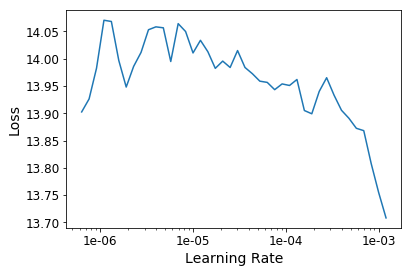

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(1, 1e-04, wd=0.2)

epoch,train_loss,valid_loss,exp_rmspe
1,inf,nan,nan


In [0]:
learn.save('1')

In [0]:
learn.recorder.plot_losses(last=-1)

TypeError: ignored